<a href="https://colab.research.google.com/github/Dhanyamanogaran/Tasks_Guvi_D12/blob/main/assignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
df = pd.read_csv('/content/glass_data.csv')


In [ ]:
df.head()

,column_a,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,column_k
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   column_a  214 non-null    int64  
 1   column_b  214 non-null    float64
 2   column_c  214 non-null    float64
 3   column_d  214 non-null    float64
 4   column_e  214 non-null    float64
 5   column_f  214 non-null    float64
 6   column_g  214 non-null    float64
 7   column_h  214 non-null    float64
 8   column_i  214 non-null    float64
 9   column_j  214 non-null    float64
 10  column_k  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('column_k',axis=1))
Scaled = scaler.transform(df.drop('column_k',axis=1))

In [ ]:
scaledview = pd.DataFrame(Scaled,columns=df.columns[:-1])
scaledview.head()

,column_a,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j
0,-1.723976,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-1.707788,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-1.691601,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-1.675413,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-1.659226,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Scaled,df['column_k'],
                                                    test_size=0.30)


In [ ]:
import math
print(math .sqrt(len(y_train)))
print(len(y_train))

12.206555615733702
149


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [ ]:
y_pre = knn.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score,accuracy_score
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        26
           2       0.48      0.93      0.64        15
           3       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00         2
           7       1.00      0.78      0.88         9

    accuracy                           0.72        65
   macro avg       0.41      0.45      0.42        65
weighted avg       0.64      0.72      0.66        65



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix(y_test,y_pre)


array([[26,  0,  0,  0,  0,  0],
       [ 1, 14,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  1,  0],
       [ 0,  1,  1,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  7]])

In [ ]:
accuracy_score(y_test, y_pre)

0.7230769230769231

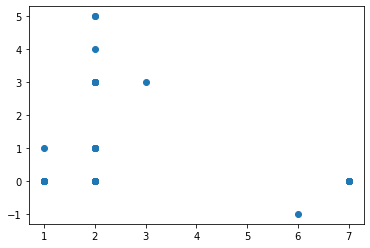

In [ ]:
residuals = y_test - y_pre
residuals.mean()
plt.scatter(y_pre, residuals)

In [ ]:
error_rate = []

# Will take some time
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

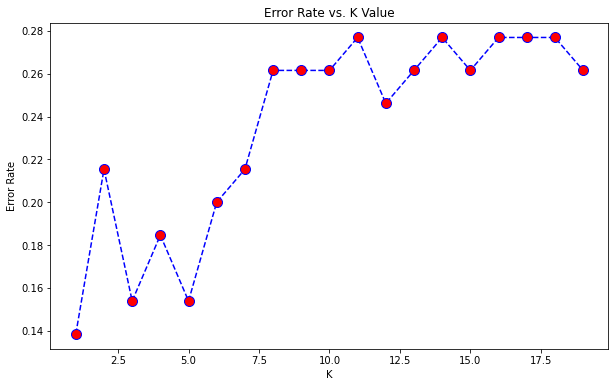

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')